In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [76]:
data=pd.read_csv('footfall.csv')

In [77]:
data

,Month-Year,Footfalls
0,01-01-2009,1709
1,01-02-2009,1621
2,01-03-2009,1973
3,01-04-2009,1812
4,01-05-2009,1975
...,...,...
148,01-05-2021,2105
149,01-06-2021,2130
150,01-07-2021,2223
151,01-08-2021,2174


MAPE: nan%
RMSE: 232.71


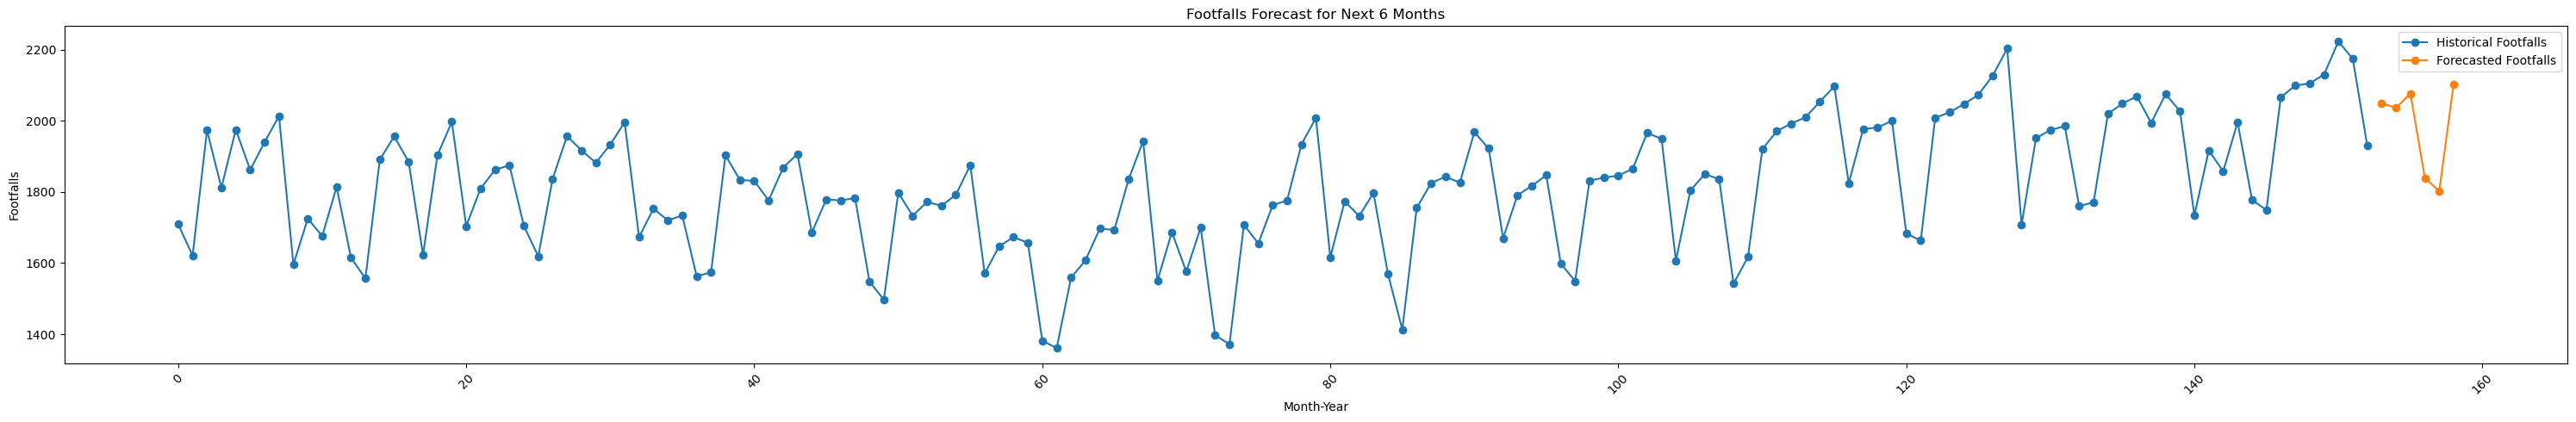

In [90]:
data['Month-Year'] = pd.to_datetime(data['Month-Year'], format='%d-%m-%Y')
model = ExponentialSmoothing(data['Footfalls'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Generate Forecasts for the Next 6 Months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate MAPE and RMSE
actual_values = data['Footfalls'].tail(forecast_steps)
errors = abs(actual_values - forecast)
mape = np.mean(errors / np.maximum(1, actual_values)) * 100
rmse = sqrt(mean_squared_error(actual_values, forecast))

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Visualize Historical and Forecasted Values
plt.figure(figsize=(30, 5))
plt.plot(data.index, data['Footfalls'], label='Historical Footfalls', marker='o')
plt.plot(forecast.index, forecast, label='Forecasted Footfalls', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Footfalls')
plt.title('Footfalls Forecast for Next 6 Months')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sample_plot.png')
plt.show()



In [83]:
try:
    mape = np.mean(errors / np.maximum(1, actual_values)) * 100
except ZeroDivisionError:
    mape = np.nan

In [85]:
mape

nan

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
   

In [86]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

nan